In [2]:
import os
import json
import pandas as pd
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt

In [3]:
root = '../data/rawneuroninput/'

In [7]:
batch = [128]
neurons = [16, 32, 64, 128]
activation = ['sigmoid', 'relu']
reg = ['none', 'l1', 'l2']

In [12]:
# Print the min and max value for the raw input data over all neurons for stability (composite activation function)
d = dict()
i = 1
for b in batch:
    for n in neurons:
        for act in activation:
            for r in reg:
                print(f'''{i}/{len(batch) * len(neurons) * len(activation) * len(reg)} => batch: {b} | neurons: {n} | activation: {act} | regularizer: {r}''')
                file = f'batch{b}neurons{n}_{act}_reg_{r}.csv'
                if os.path.exists(root + file):
                    data = genfromtxt(root + file, delimiter=',').flatten()
                    d[file[:-4]] = (round(np.min(data), 2), round(np.max(data), 2))
                del data
                i += 1
d

1/24 => batch: 128 | neurons: 16 | activation: sigmoid | regularizer: none
2/24 => batch: 128 | neurons: 16 | activation: sigmoid | regularizer: l1
3/24 => batch: 128 | neurons: 16 | activation: sigmoid | regularizer: l2
4/24 => batch: 128 | neurons: 16 | activation: relu | regularizer: none
5/24 => batch: 128 | neurons: 16 | activation: relu | regularizer: l1
6/24 => batch: 128 | neurons: 16 | activation: relu | regularizer: l2
7/24 => batch: 128 | neurons: 32 | activation: sigmoid | regularizer: none
8/24 => batch: 128 | neurons: 32 | activation: sigmoid | regularizer: l1
9/24 => batch: 128 | neurons: 32 | activation: sigmoid | regularizer: l2
10/24 => batch: 128 | neurons: 32 | activation: relu | regularizer: none
11/24 => batch: 128 | neurons: 32 | activation: relu | regularizer: l1
12/24 => batch: 128 | neurons: 32 | activation: relu | regularizer: l2
13/24 => batch: 128 | neurons: 64 | activation: sigmoid | regularizer: none
14/24 => batch: 128 | neurons: 64 | activation: sigmoid

{'batch128neurons16_sigmoid_reg_none': (-15.66, 13.34),
 'batch128neurons16_sigmoid_reg_l1': (-15.78, 15.16),
 'batch128neurons16_sigmoid_reg_l2': (-15.69, 17.07),
 'batch128neurons16_relu_reg_none': (-7.39, 4.96),
 'batch128neurons16_relu_reg_l1': (-8.43, 4.2),
 'batch128neurons16_relu_reg_l2': (-6.34, 6.01),
 'batch128neurons32_sigmoid_reg_none': (-16.43, 14.31),
 'batch128neurons32_sigmoid_reg_l1': (-15.4, 12.13),
 'batch128neurons32_sigmoid_reg_l2': (-16.19, 13.15),
 'batch128neurons32_relu_reg_none': (-5.77, 5.39),
 'batch128neurons32_relu_reg_l1': (-4.66, 4.02),
 'batch128neurons32_relu_reg_l2': (-5.49, 4.99),
 'batch128neurons64_sigmoid_reg_none': (-17.97, 10.39),
 'batch128neurons64_sigmoid_reg_l1': (-17.44, 9.31),
 'batch128neurons64_sigmoid_reg_l2': (-18.96, 10.53),
 'batch128neurons64_relu_reg_none': (-11.47, 3.89),
 'batch128neurons64_relu_reg_l1': (-11.27, 4.15),
 'batch128neurons64_relu_reg_l2': (-4.44, 3.14),
 'batch128neurons128_sigmoid_reg_none': (-20.42, 11.18),
 'bat

In [13]:
result_base = '../results/neuronsinputrange/'
with open(result_base + 'input_range_batch128.txt', 'w') as json_file:
    json.dump(d, json_file)

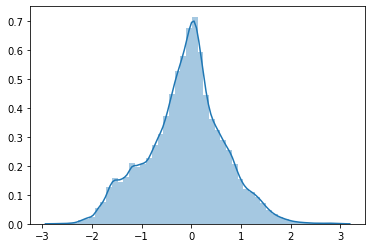

In [8]:
# There is a lot of zeros in the dataset (may be an issue of the program) so we remove it to get a sense of the
# distribution of non zeros values

sns.distplot(inputs[(inputs > 0.) | (inputs < 0.)])

In [10]:
np.min(inputs), np.max(inputs)

(-2.750118, 2.9998560000000003)

In [ ]:
# TODO Check for zeros raw inputs. -> Probably due to initialization